In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from core.data import load_from_kaggle


c:\Users\Trainee\Documents\Hallo_DPP\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_link = "shriyashjagtap/esg-and-financial-performance-dataset" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

100%|██████████| 379k/379k [00:00<00:00, 1.36MB/s]

Extracting files...
Loading dataset from C:\Users\Trainee\.cache\kagglehub\datasets\shriyashjagtap\esg-and-financial-performance-dataset\versions\1 to ../data/raw\esg-and-financial-performance-dataset
Moving file: C:\Users\Trainee\.cache\kagglehub\datasets\shriyashjagtap\esg-and-financial-performance-dataset\versions\1\company_esg_financial_dataset.csv to c:\Users\Trainee\Documents\Hallo_DPP\notebooks\../data/raw\esg-and-financial-performance-dataset
Files moved to '../data/raw\esg-and-financial-performance-dataset' directory.


In [3]:
files

['company_esg_financial_dataset.csv']

In [4]:
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
df.head()

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
0,1,Company_1,Retail,Latin America,2015,459.2,6.0,337.5,NaN,57.0,60.7,33.5,76.8,35577.4,17788.7,71154.7
1,1,Company_1,Retail,Latin America,2016,473.8,4.6,366.6,3.2,56.7,58.9,32.8,78.5,37314.7,18657.4,74629.4
2,1,Company_1,Retail,Latin America,2017,564.9,5.2,313.4,19.2,56.5,57.6,34.0,77.8,45006.4,22503.2,90012.9
3,1,Company_1,Retail,Latin America,2018,558.4,4.3,283.0,-1.1,58.0,62.3,33.4,78.3,42650.1,21325.1,85300.2
4,1,Company_1,Retail,Latin America,2019,554.5,4.9,538.1,-0.7,56.6,63.7,30.0,76.1,41799.4,20899.7,83598.8


In [5]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(11000, 16)

'Description'

,count,mean,std,min,25%,50%,75%,max
CompanyID,11000.0,500.50,288.69,1.0,250.75,500.50,750.25,1.000000e+03
Year,11000.0,2020.00,3.16,2015.0,2017.00,2020.00,2023.00,2.025000e+03
Revenue,11000.0,4670.85,9969.95,35.9,938.78,1902.30,4342.62,1.808104e+05
ProfitMargin,11000.0,10.90,8.76,-20.0,5.30,10.50,16.30,5.000000e+01
MarketCap,11000.0,13380.62,39922.87,1.8,1098.52,3096.45,9995.50,8.652717e+05
GrowthRate,10000.0,4.83,9.42,-36.0,-1.32,4.90,11.00,3.800000e+01
ESG_Overall,11000.0,54.62,15.89,6.3,44.10,54.60,65.60,9.880000e+01
ESG_Environmental,11000.0,56.42,26.77,0.0,34.70,55.60,79.00,1.000000e+02
ESG_Social,11000.0,55.66,23.36,0.0,37.60,55.15,73.80,1.000000e+02
ESG_Governance,11000.0,51.77,25.32,0.0,30.78,52.10,73.00,1.000000e+02


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
CompanyID,int64,0,1000,"[54, 846, 857]"
CompanyName,object,0,1000,"[Company_16, Company_88, Company_750]"
Industry,object,0,9,"[Healthcare, Technology, Manufacturing]"
Region,object,0,7,"[North America, Middle East, Africa]"
Year,int64,0,11,"[2019, 2020, 2022]"
Revenue,float64,0,9965,"[207.8, 2748.1, 8109.4]"
ProfitMargin,float64,0,536,"[13.7, 17.5, 20.7]"
MarketCap,float64,0,10385,"[32323.9, 702.0, 3987.0]"
GrowthRate,float64,1000,562,"[4.8, 23.1, 9.8]"
ESG_Overall,float64,0,823,"[66.4, 68.7, 63.4]"


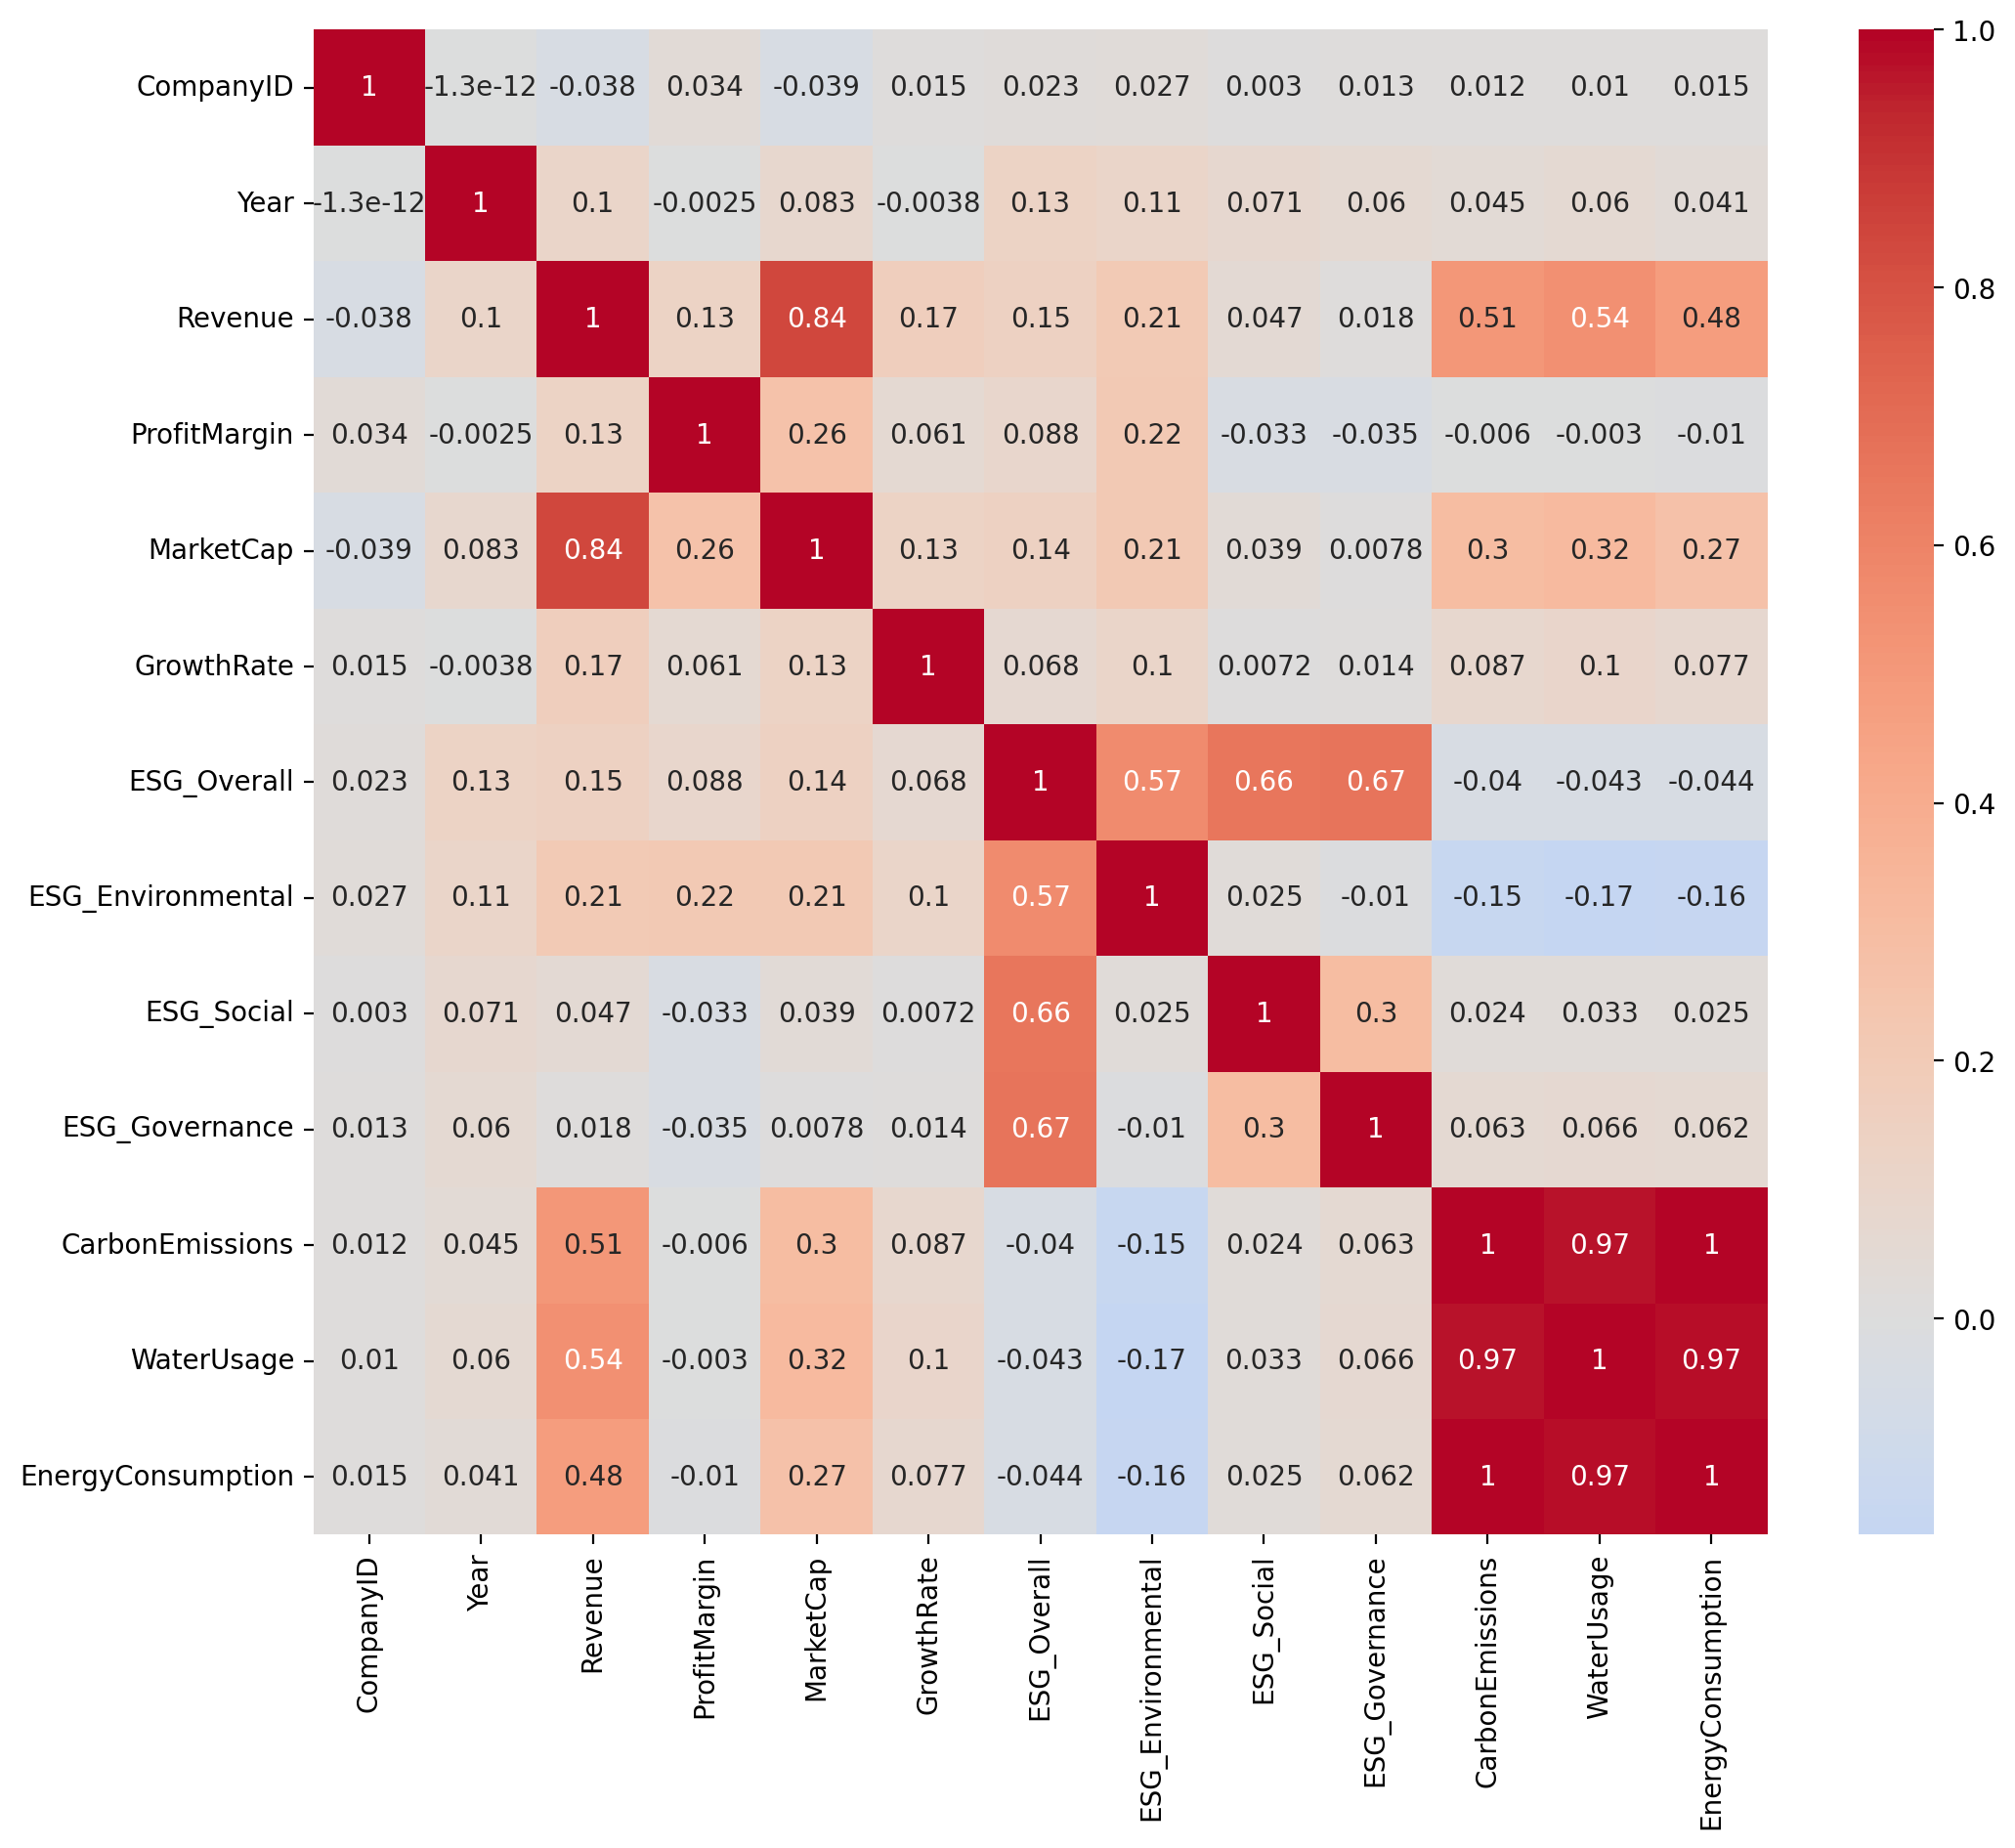

In [6]:
fig, ax = plt.subplots(figsize=(12, 10), dpi=200)

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax);